Entrega final

Shara Jaramillo

*Limosilactobacillus reuteri* (firmicutes) Strain: 92071

Se descargó la secuencia del ncbi con link: https://www.ncbi.nlm.nih.gov/assembly/GCA_028462635.1 y se subió a apolo mediante fillezilla. 


In [ ]:
#1. Se cargó python
load python/3.6.0_miniconda-4.3.11_gcc-11.2.0

#2. Se creó un enviroment
conda create --name ensamble

#3. Se activó el enviroment
conda activate ensamble



In [ ]:
#4. Se instalaron los softwares y paquetes 

#Fastqc
conda install -c bioconda fastqc

#Trimmomatic
conda install -c bioconda trimmomatic

#ABySS
conda install -c bioconda abyss


In [ ]:
#5. Se chequeó la calidad de los reads 

fastqc /home/sjaramil16/slurm/ejerciciofinal/SRR23493805.fastq

#6. Se descagó el reporte en la terminal del computador (no de apolo)
scp sjaramil16@apolo.eafit.edu.co:/home/sjaramil16/slurm/ejerciciofinal/SRR23493805_fastqc.html . 


Calidad de los reads 




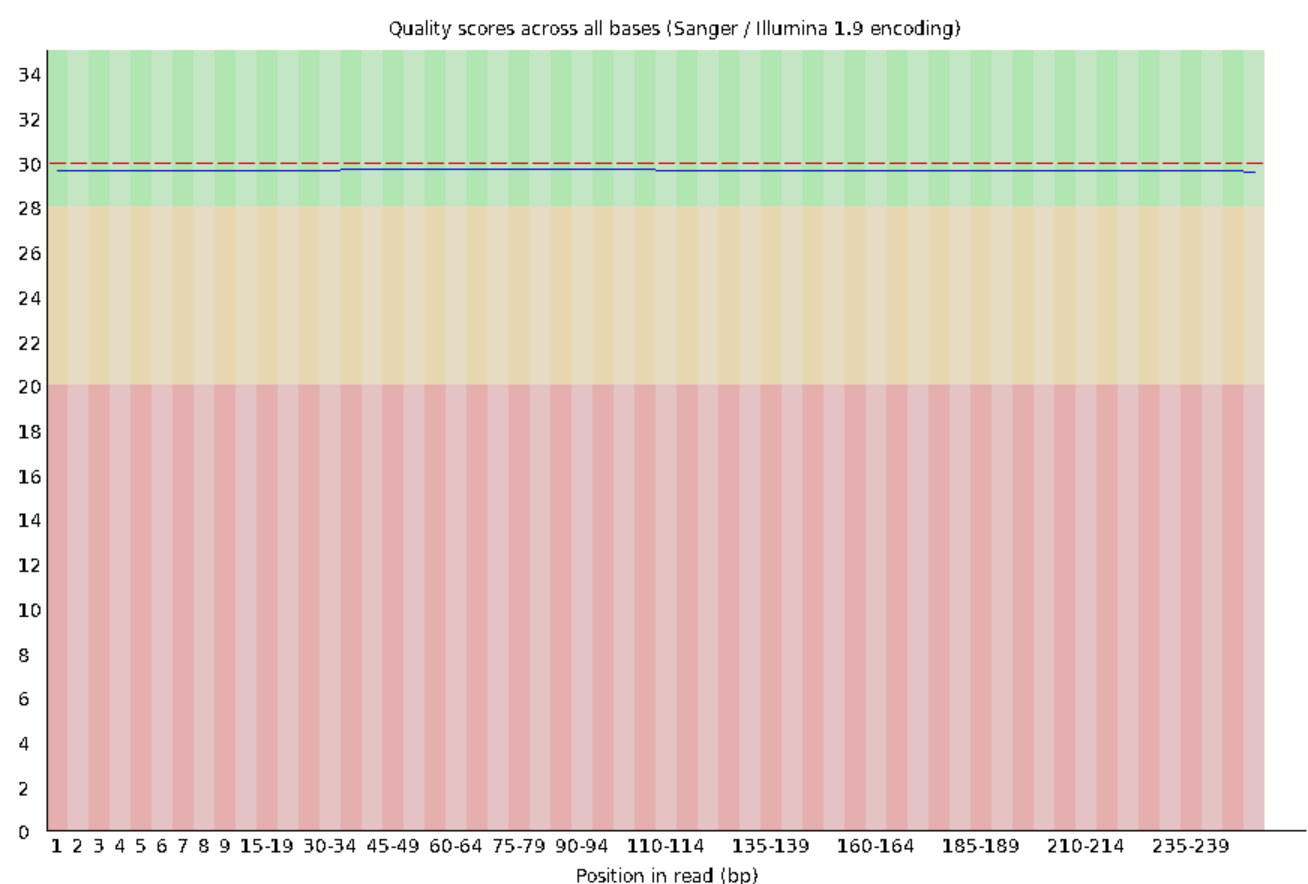

In [ ]:
#7. Se recortaron los reads 
trimmomatic SE -phred33 SRR23493805.fastq trimmed.fastaq SLIDINGWINDOW:4:20 MINLEN:25

#8. Se chequeó la calidad de los cortes 
fastqc trimmed.fastaq 

#9. Se descargó el reporte la calidad de los cortes
scp sjaramil16@apolo.eafit.edu.co:/home/sjaramil16/slurm/ejerciciofinal/trimmed.fastaq_fastqc.html .

calidad de los reads recortados con MINLEN = 25
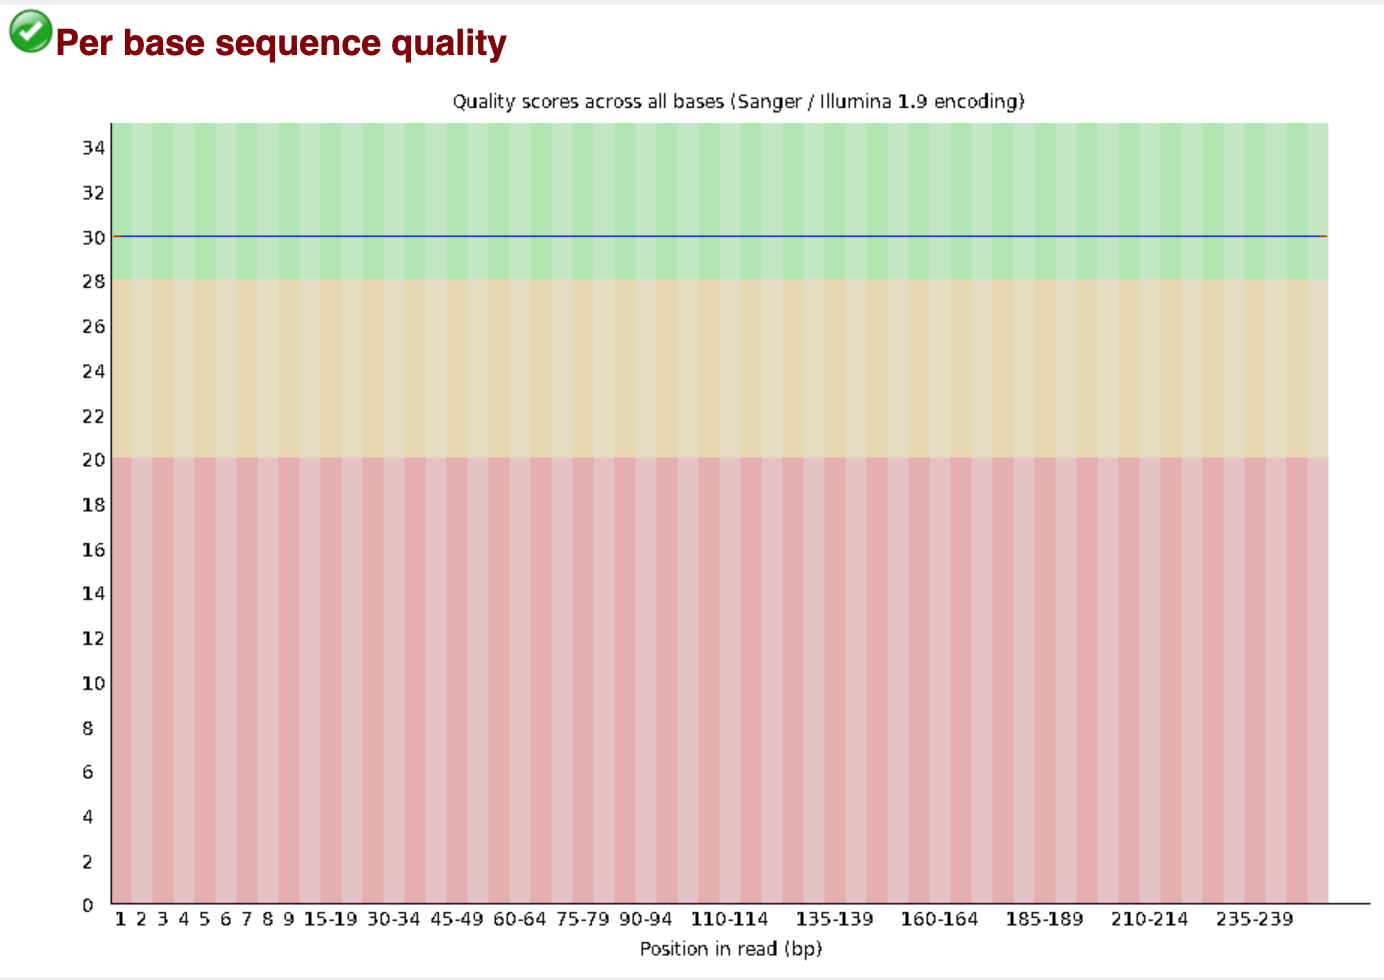

In [ ]:
#10. Se recortaron los reads per sin MINLEN
trimmomatic SE -phred33 SRR23493805.fastq trimmed.fastaq SLIDINGWINDOW:4:20 

#11. Se chequeó la calidad de los cortes 
fastqc trimmed1.fastaq 

#12. Se descargó el reporte la calidad de los cortes
scp sjaramil16@apolo.eafit.edu.co:/home/sjaramil16/slurm/ejerciciofinal/trimmed1.fastaq_fastqc.html .

calidad de los reads recortados

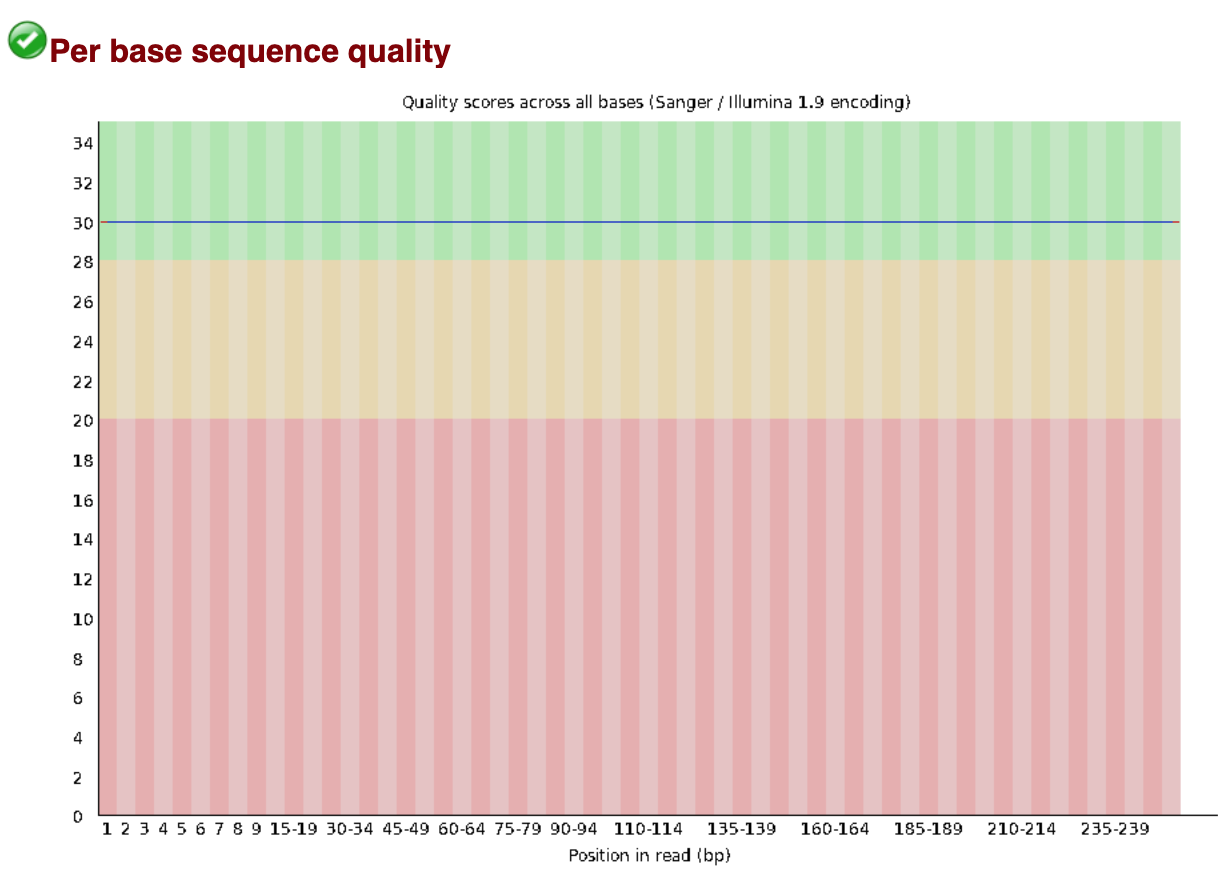

In [ ]:
#13. se realizó el ensamblaje en ABySS anssembly con K=63
abyss-pe k=63 se=trimmed.fastq name=trimmed63 "unitigs"

#14. se realizó el AByss stats
abyss-fac trim63-unitigs.fa


Ensamble con K= 63
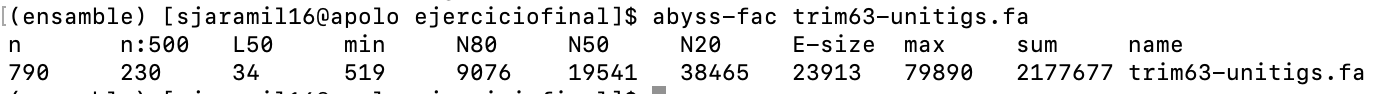

In [ ]:
#15. se realizó el ensamblaje en ABySS anssembly con K=93
abyss-pe k=93 se=trimmed.fastq  name=trim93 "unitigs"
#16. se realizó el AByss stats
abyss-fac trim93-unitigs.fa


Ensamble con K= 93
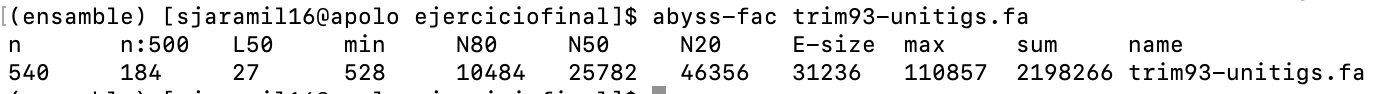

In [ ]:
#17. se realizó el ensamblaje en ABySS anssembly con K=50
abyss-pe k=50 se=se=trimmed.fastq  name=trim50 "unitigs"

##18. se realizó el AByss stats
abyss-fac trim50-unitigs.fa


Ensamble con K= 50
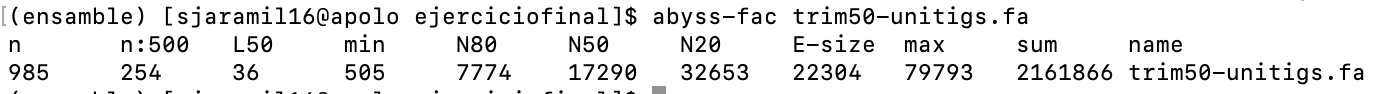

19.Se comparó el ensamblaje con el reportado 
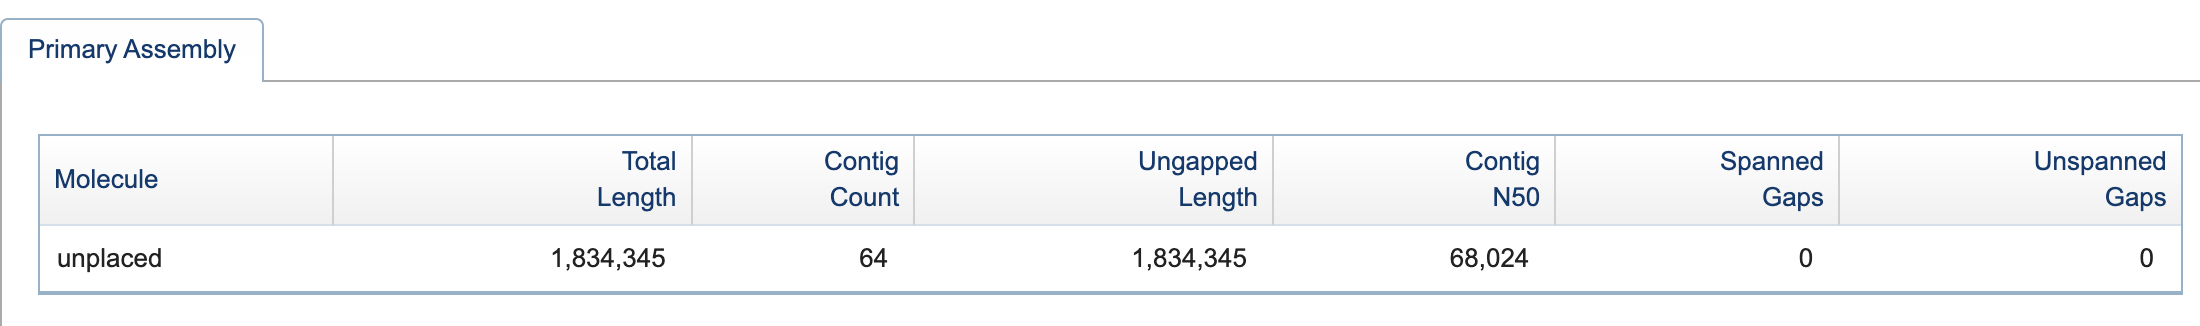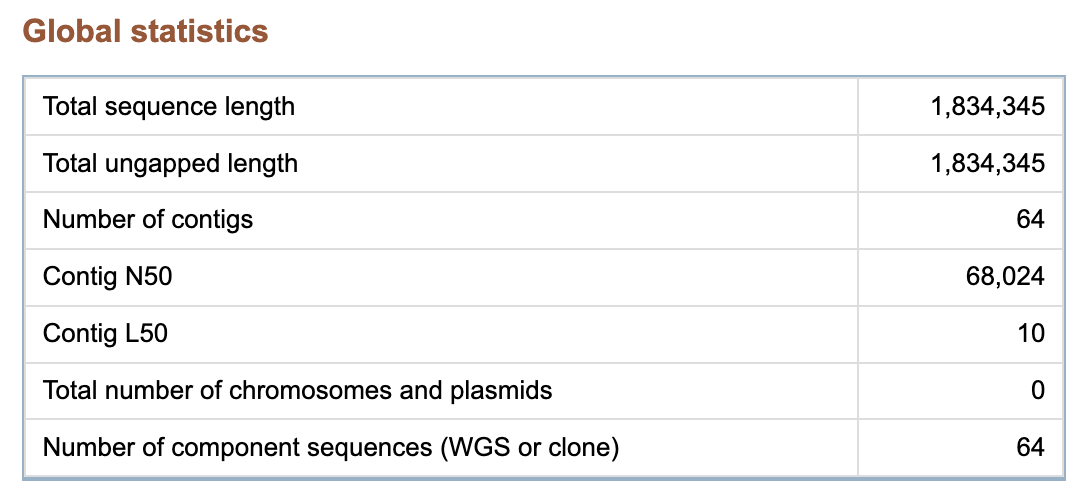

Dado un conjunto de contigs, cada uno con su propia longitud, el L50 se define como el recuento del menor número de contigs cuya longitud suma la mitad del tamaño del genoma. En este caso para el NCBI se reporta L50= 10. Mientras que para los ensamblajes realizados con abyss-pe k=50, k=63 y K= 93, se reporta un L50= 36, L50= 34, L50= 27, respectivamente. por lo que se infiere que la similitud entre ensamblajes es un poco distinta pero con k mayor a 93 podría lograrse un ensamblaje similar al reportado en el NCBI. 